### Problem - 1: Getting Started with Data Exploration - Some Warm up Exercises:

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [36]:
df = pd.read_csv('/content/drive/MyDrive/Concepts and Technology of AI/WHR-2024-5CS037.csv')

In [37]:
# 1.1 Dataset Overview
#1
print("First 10 rows:")
print(df.head(10))

#2
print("\nDataset Dimensions:")
print(f"Number of Rows: {df.shape[0]}")
print(f"Number of Columns: {df.shape[1]}")

#3
print("\nColumns and Data Types:")
print(df.dtypes)

First 10 rows:
  Country name  score  Log GDP per capita  Social support  \
0      Finland  7.741               1.844           1.572   
1      Denmark  7.583               1.908           1.520   
2      Iceland  7.525               1.881           1.617   
3       Sweden  7.344               1.878           1.501   
4       Israel  7.341               1.803           1.513   
5  Netherlands  7.319               1.901           1.462   
6       Norway  7.302               1.952           1.517   
7   Luxembourg  7.122               2.141           1.355   
8  Switzerland  7.060               1.970           1.425   
9    Australia  7.057               1.854           1.461   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.695                         0.859       0.142   
1                    0.699                         0.823       0.204   
2                    0.718                         0.819       0.258   
3                    0.72

In [38]:
# 1.2 Basic Statistics

#1
print("Score Statistics:")
print(f"Mean Score: {df['score'].mean():.2f}")
print(f"Median Score: {df['score'].median():.2f}")
print(f"Standard Deviation of Score: {df['score'].std():.2f}")

#2
print("\nHighest and Lowest Happiness Scores:")
print(f"Highest Score: {df.loc[df['score'].idxmax(), 'Country name']} ({df['score'].max():.2f})")
print(f"Lowest Score: {df.loc[df['score'].idxmin(), 'Country name']} ({df['score'].min():.2f})")

Score Statistics:
Mean Score: 5.53
Median Score: 5.79
Standard Deviation of Score: 1.17

Highest and Lowest Happiness Scores:
Highest Score: Finland (7.74)
Lowest Score: Afghanistan (1.72)


In [39]:
# 1.3 Missing Values
print("Missing Values:")
print(df.isnull().sum())

Missing Values:
Country name                    0
score                           0
Log GDP per capita              3
Social support                  3
Healthy life expectancy         3
Freedom to make life choices    3
Generosity                      3
Perceptions of corruption       3
Dystopia + residual             3
dtype: int64


In [40]:
# 1.4 Filtering and Sorting
high_score_countries = df[df['score'] > 7.5]
print("Countries with Score > 7.5:")
print(high_score_countries[['Country name', 'score']])

high_score_gdp_sorted = high_score_countries.sort_values('Log GDP per capita', ascending=False).head(10)
print("\nTop 10 High-Score Countries by GDP per Capita:")
print(high_score_gdp_sorted[['Country name', 'score', 'Log GDP per capita']])

Countries with Score > 7.5:
  Country name  score
0      Finland  7.741
1      Denmark  7.583
2      Iceland  7.525

Top 10 High-Score Countries by GDP per Capita:
  Country name  score  Log GDP per capita
1      Denmark  7.583               1.908
2      Iceland  7.525               1.881
0      Finland  7.741               1.844


In [52]:
# 1.5 Adding New Columns
def categorize_happiness(score):
    if score < 4:
        return 'Low'
    elif 4 <= score <= 6:
        return 'Medium'
    else:
        return 'High'

df['Happiness Category'] = df['score'].apply(categorize_happiness)

# This adds a new column 'Happiness Category'
df.to_csv('/content/drive/MyDrive/Concepts and Technology of AI/WHR-2024-5CS037.csv', index=False)
df.head()


,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,Happiness Category
0,Finland,7.741,1.844,1.572,0.695,0.859,0.142,0.546,2.082,High
1,Denmark,7.583,1.908,1.520,0.699,0.823,0.204,0.548,1.881,High
2,Iceland,7.525,1.881,1.617,0.718,0.819,0.258,0.182,2.050,High
3,Sweden,7.344,1.878,1.501,0.724,0.838,0.221,0.524,1.658,High
4,Israel,7.341,1.803,1.513,0.740,0.641,0.153,0.193,2.298,High


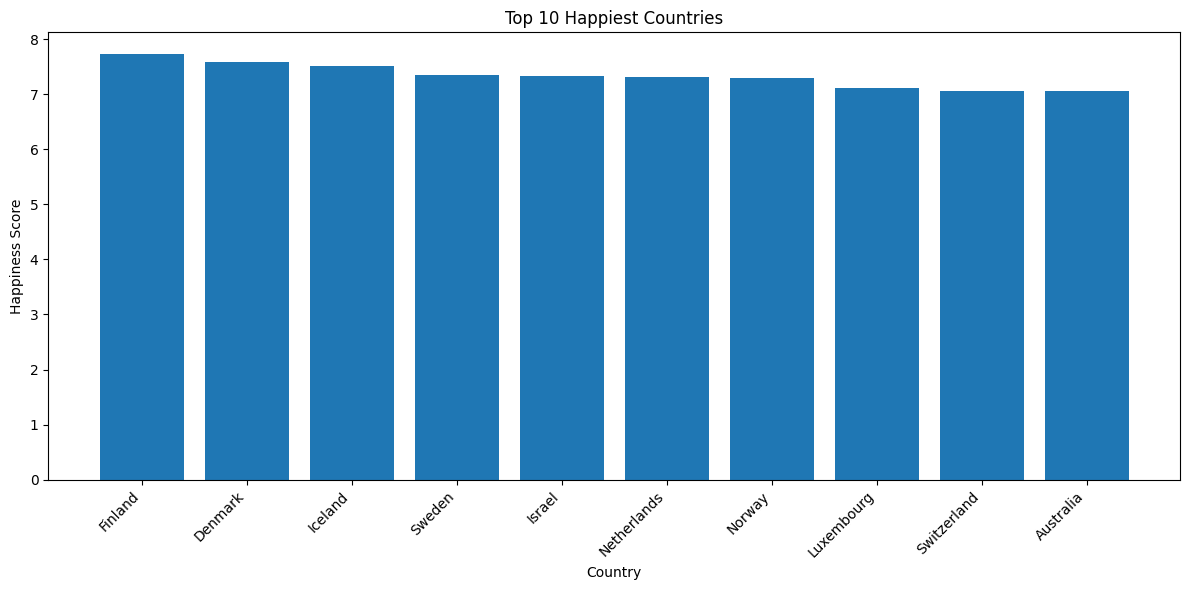

In [42]:
# 1.6 Data Visualizations

# Bar Plot
plt.figure(figsize=(12, 6))
top_10_happiest = df.nlargest(10, 'score')
plt.bar(top_10_happiest['Country name'], top_10_happiest['score'])
plt.title('Top 10 Happiest Countries')
plt.xlabel('Country')
plt.ylabel('Happiness Score')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
plt.close()


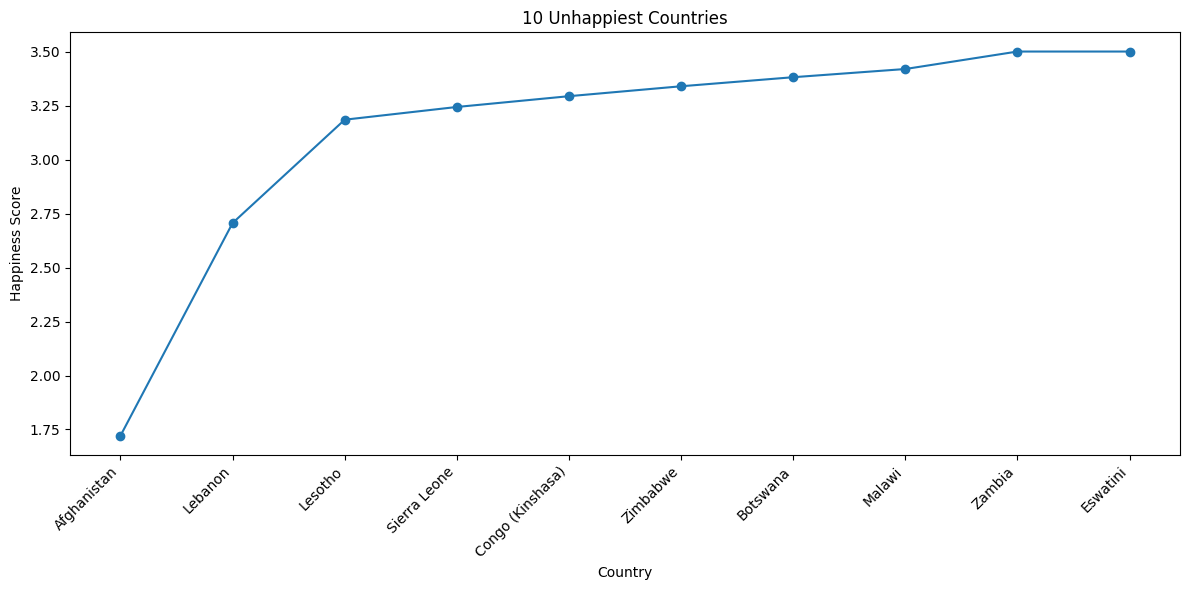

In [43]:
# Line Plot
plt.figure(figsize=(12, 6))
bottom_10_unhappiest = df.nsmallest(10, 'score')
plt.plot(bottom_10_unhappiest['Country name'], bottom_10_unhappiest['score'], marker='o')
plt.title('10 Unhappiest Countries')
plt.xlabel('Country')
plt.ylabel('Happiness Score')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
plt.close()

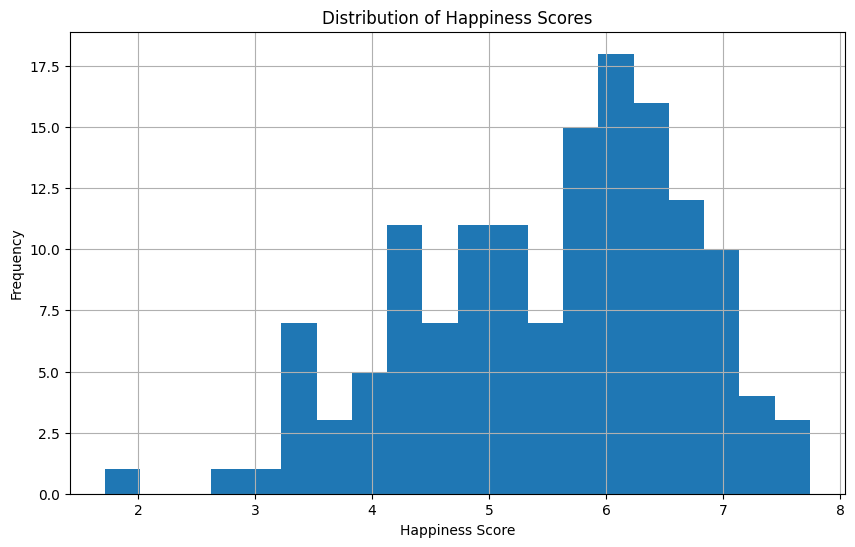

In [44]:
# Histogram
plt.figure(figsize=(10, 6))
df['score'].hist(bins=20)
plt.title('Distribution of Happiness Scores')
plt.xlabel('Happiness Score')
plt.ylabel('Frequency')
plt.show()
plt.close()

**Interpretation:**

**Range of Scores:** Although the scores seem to span from approximately 2 to around 8, it represents the various levels of happiness that all countries experience.

**Concentration of Scores:** Many nations have scores anywhere from 6 to 8, which represent part of the "High" Happiness Category. There are not many countries in the Medium (between 4 and 6) or Low (under 4) ranges.

**Skewness:** The distribution is left-skewed, with more countries having higher scores, indicating that a large proportion of countries tend to be happier on average.



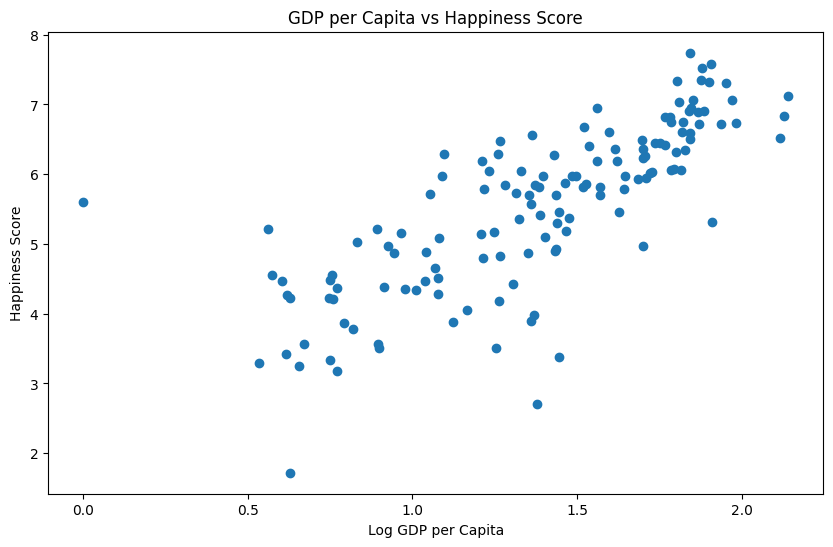

In [45]:
# Scatter Plot
plt.figure(figsize=(10, 6))
plt.scatter(df['Log GDP per capita'], df['score'])
plt.title('GDP per Capita vs Happiness Score')
plt.xlabel('Log GDP per Capita')
plt.ylabel('Happiness Score')
plt.show()
plt.close()

### Problem - 2 - Some Advance Data Exploration Task:

In [48]:
# Task - 1 - Setup Task - Preparing the South-Asia Dataset:

south_asian_countries = ["Afghanistan", "Bangladesh", "Bhutan", "India", "Maldives", "Nepal", "Pakistan", "Sri Lanka"]
south_asia_df = df[df['Country name'].isin(south_asian_countries)].copy()

# Saves the filtered DataFrame as a CSV file in Google Drive
south_asia_df.to_csv('/content/drive/MyDrive/Concepts and Technology of AI/south_asia_dataset.csv', index=False)



South Asia Composite Score Ranking:
    Country name  Composite Score
127    Sri Lanka           1.0739
92         Nepal           0.8159
125        India           0.7874
107     Pakistan           0.7039
128   Bangladesh           0.6774
142  Afghanistan           0.3238


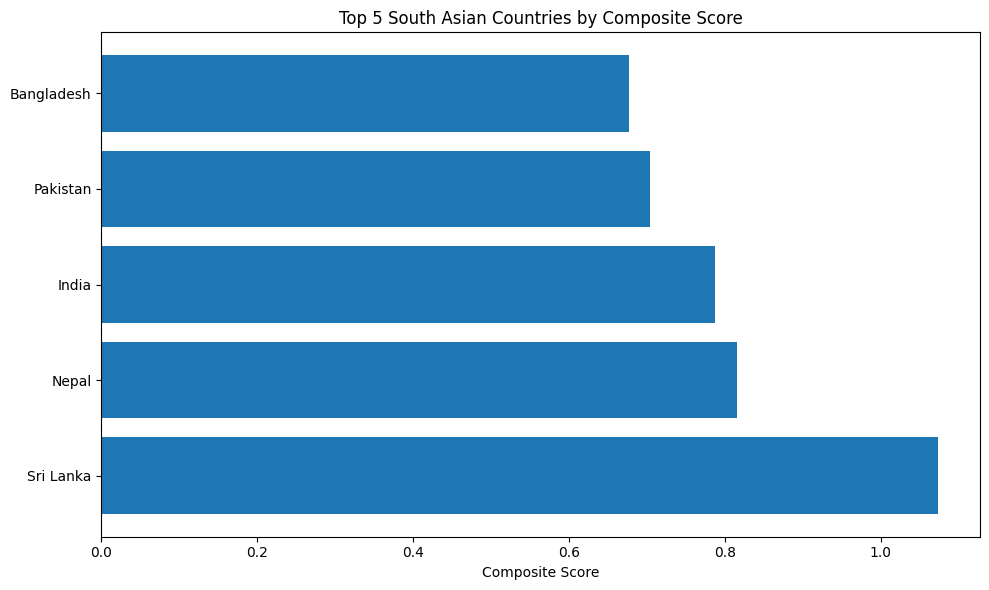

In [60]:
# Task - 2 - Composite Score Ranking:

# Calculate Composite Score
south_asia_df['Composite Score'] = (
    0.40 * south_asia_df['Log GDP per capita'] +
    0.30 * south_asia_df['Social support'] +
    0.30 * south_asia_df['Healthy life expectancy']
)

# Ranking South Asian Countries
south_asia_ranked = south_asia_df.sort_values('Composite Score', ascending=False)
print("\nSouth Asia Composite Score Ranking:")
print(south_asia_ranked[['Country name', 'Composite Score']])

plt.figure(figsize=(10, 6))
plt.barh(south_asia_ranked['Country name'][:5], south_asia_ranked['Composite Score'][:5])
plt.title('Top 5 South Asian Countries by Composite Score')
plt.xlabel('Composite Score')
plt.tight_layout()
plt.show()
plt.close()



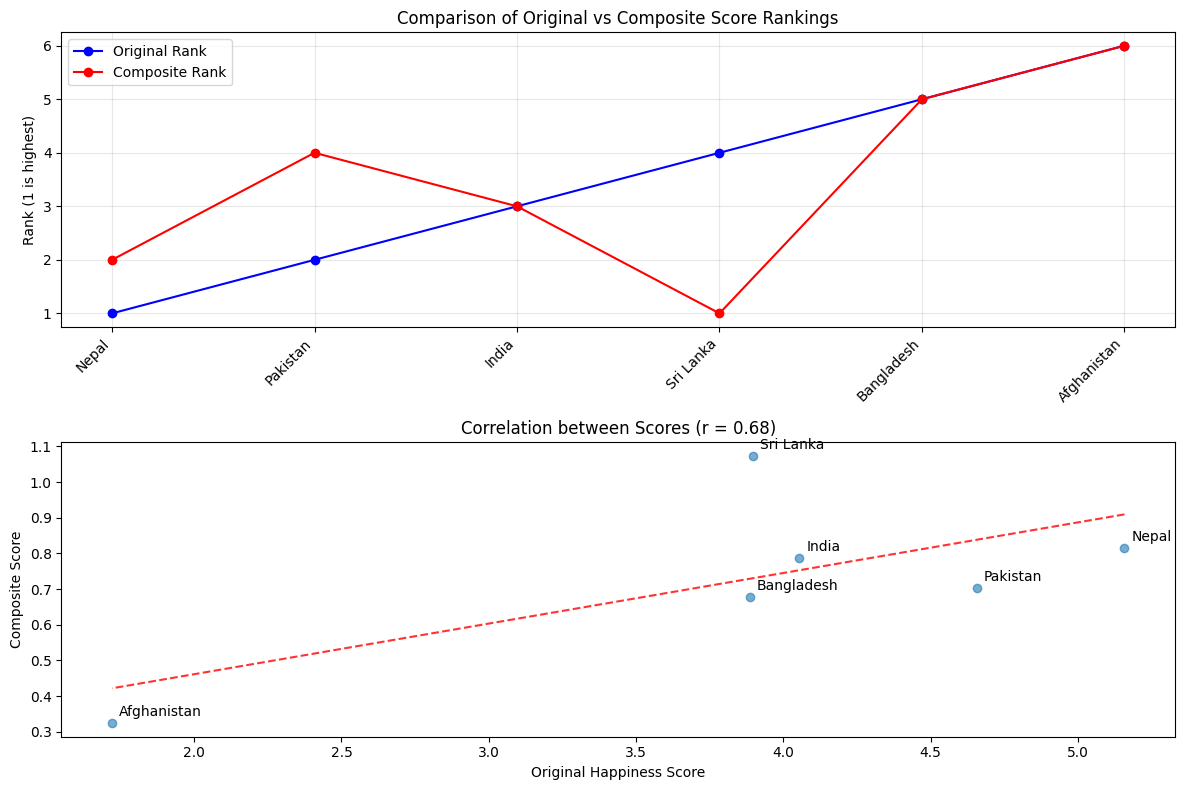


Comparison of Rankings:
    Country name  score  Composite Score  Original Rank  Composite Rank  \
92         Nepal  5.158            0.816            1.0             2.0   
107     Pakistan  4.657            0.704            2.0             4.0   
125        India  4.054            0.787            3.0             3.0   
127    Sri Lanka  3.898            1.074            4.0             1.0   
128   Bangladesh  3.886            0.677            5.0             5.0   
142  Afghanistan  1.721            0.324            6.0             6.0   

     Rank Difference  
92              -1.0  
107             -2.0  
125              0.0  
127              3.0  
128              0.0  
142              0.0  


<ipython-input-65-c86329a6a5d4>:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comparison_df['Rank Difference'] = comparison_df['Original Rank'] - comparison_df['Composite Rank']


In [65]:
# 2 - 4 - Comparison of Original vs Composite Score Rankings

# Creating rankings for both scores
south_asia_df['Original Rank'] = south_asia_df['score'].rank(ascending=False)
south_asia_df['Composite Rank'] = south_asia_df['Composite Score'].rank(ascending=False)

# Calculating correlation between scores
score_correlation = south_asia_df['score'].corr(south_asia_df['Composite Score'])

# Creating a comparison visualization
plt.figure(figsize=(12, 8))

# Creating subplot 1: Parallel rankings
plt.subplot(2, 1, 1)
x = range(len(south_asia_df))
plt.plot(south_asia_df['Country name'], south_asia_df['Original Rank'], 'bo-', label='Original Rank')
plt.plot(south_asia_df['Country name'], south_asia_df['Composite Rank'], 'ro-', label='Composite Rank')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Rank (1 is highest)')
plt.title('Comparison of Original vs Composite Score Rankings')
plt.legend()
plt.grid(True, alpha=0.3)

# Creating subplot 2: Scatter plot with regression line
plt.subplot(2, 1, 2)
plt.scatter(south_asia_df['score'], south_asia_df['Composite Score'], alpha=0.6)
z = np.polyfit(south_asia_df['score'], south_asia_df['Composite Score'], 1)
p = np.poly1d(z)
plt.plot(south_asia_df['score'], p(south_asia_df['score']), "r--", alpha=0.8)
plt.xlabel('Original Happiness Score')
plt.ylabel('Composite Score')
plt.title(f'Correlation between Scores (r = {score_correlation:.2f})')

# Adding country labels to scatter plot
for idx, row in south_asia_df.iterrows():
    plt.annotate(row['Country name'], (row['score'], row['Composite Score']),
                xytext=(5, 5), textcoords='offset points')

plt.tight_layout()
plt.show()
plt.close()

# Creating comparison table
comparison_df = south_asia_df[['Country name', 'score', 'Composite Score', 'Original Rank', 'Composite Rank']]
comparison_df['Rank Difference'] = comparison_df['Original Rank'] - comparison_df['Composite Rank']
comparison_df = comparison_df.sort_values('score', ascending=False)

print("\nComparison of Rankings:")
print(comparison_df.round(3))

Q1 Score: 3.8890000000000002
Q3 Score: 4.50625
IQR Score: 0.6172499999999994

Outliers based on Happiness Score:
    Country name  score  Log GDP per capita
142  Afghanistan  1.721               0.628


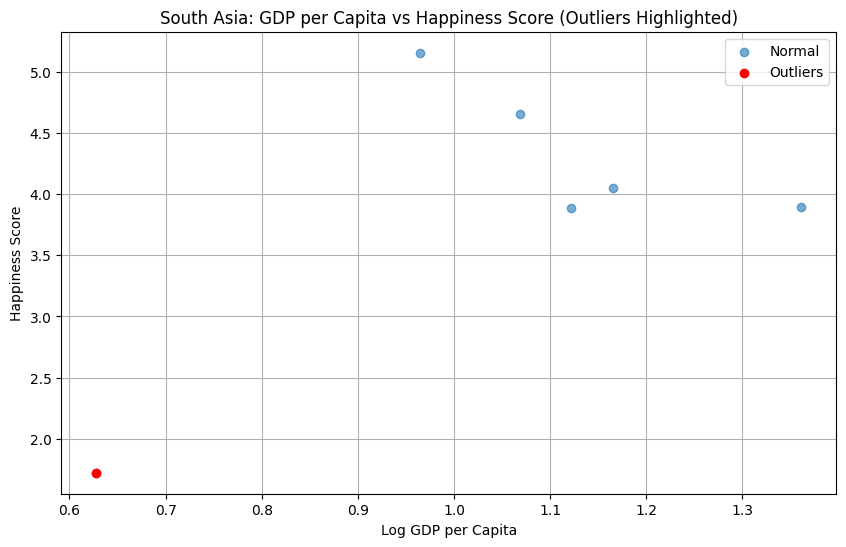

In [69]:
# Task - 3 - Outlier Detection:

# Calculating Q1, Q3, and IQR for Happiness Scores
Q1_score = south_asia_df['score'].quantile(0.25)
Q3_score = south_asia_df['score'].quantile(0.75)
IQR_score = Q3_score - Q1_score

print(f"Q1 Score: {Q1_score}")
print(f"Q3 Score: {Q3_score}")
print(f"IQR Score: {IQR_score}")

# Outliers
outliers = south_asia_df[
    (south_asia_df['score'] < (Q1_score - 1.5 * IQR_score)) |
    (south_asia_df['score'] > (Q3_score + 1.5 * IQR_score))
]

print("\nOutliers based on Happiness Score:")
print(outliers[['Country name', 'score', 'Log GDP per capita']])

# Visualization of Outliers
plt.figure(figsize=(10, 6))
plt.scatter(south_asia_df['Log GDP per capita'], south_asia_df['score'], label='Normal', alpha=0.6)
plt.scatter(outliers['Log GDP per capita'], outliers['score'], color='red', label='Outliers')
plt.title('South Asia: GDP per Capita vs Happiness Score (Outliers Highlighted)')
plt.xlabel('Log GDP per Capita')
plt.ylabel('Happiness Score')
plt.legend()
plt.grid(True)
plt.show()



Correlation between Score and Freedom to make life choices: 0.80


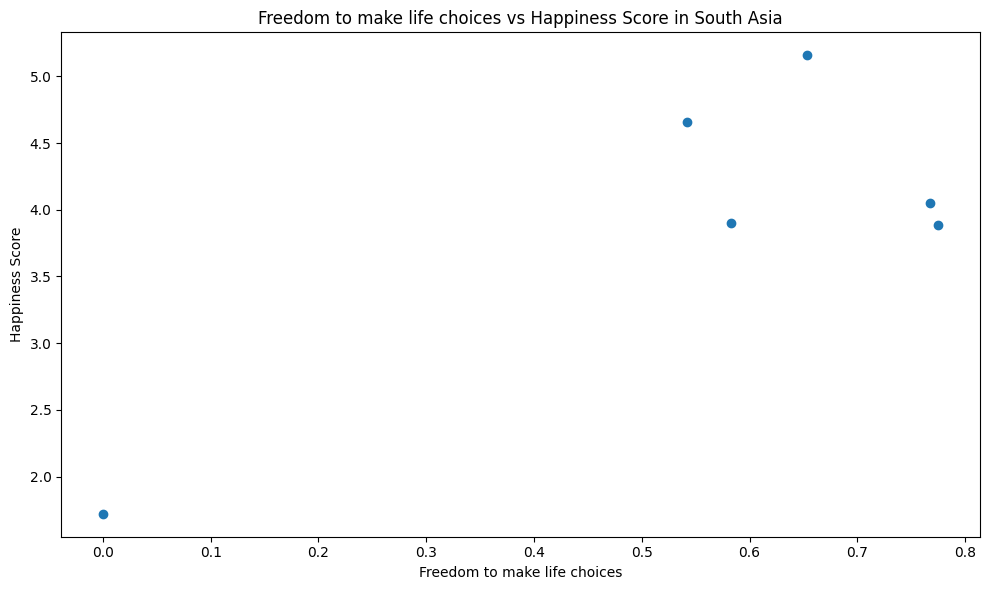


Correlation between Score and Generosity: 0.87


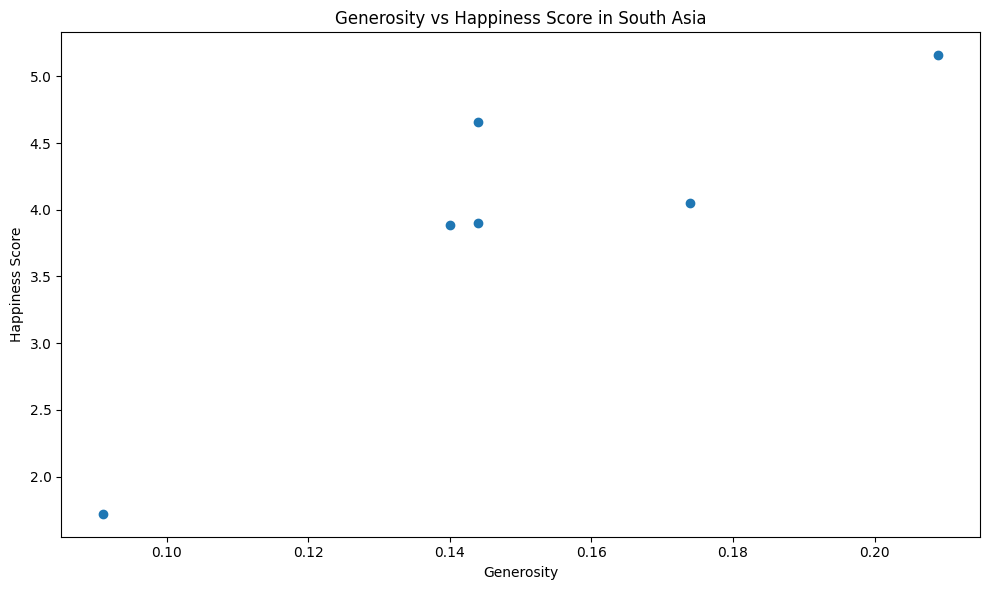

In [71]:
# Task - 4 - Exploring Trends Across Metrics:

# Correlation Analysis
metrics_to_correlate = ['Freedom to make life choices', 'Generosity']
for metric in metrics_to_correlate:
    correlation = south_asia_df['score'].corr(south_asia_df[metric])
    print(f"\nCorrelation between Score and {metric}: {correlation:.2f}")

    plt.figure(figsize=(10, 6))
    plt.scatter(south_asia_df[metric], south_asia_df['score'])
    plt.title(f'{metric} vs Happiness Score in South Asia')
    plt.xlabel(metric)
    plt.ylabel('Happiness Score')
    plt.tight_layout()
    plt.show()
    plt.close()

Ranking of South Asian Countries by GDP-Score Gap:
    Country name  GDP-Score Gap  Gap Rank Ascending  Gap Rank Descending
92         Nepal         -4.193                 1.0                  6.0
107     Pakistan         -3.588                 2.0                  5.0
125        India         -2.888                 3.0                  4.0
127    Sri Lanka         -2.537                 5.0                  2.0
128   Bangladesh         -2.764                 4.0                  3.0
142  Afghanistan         -1.093                 6.0                  1.0


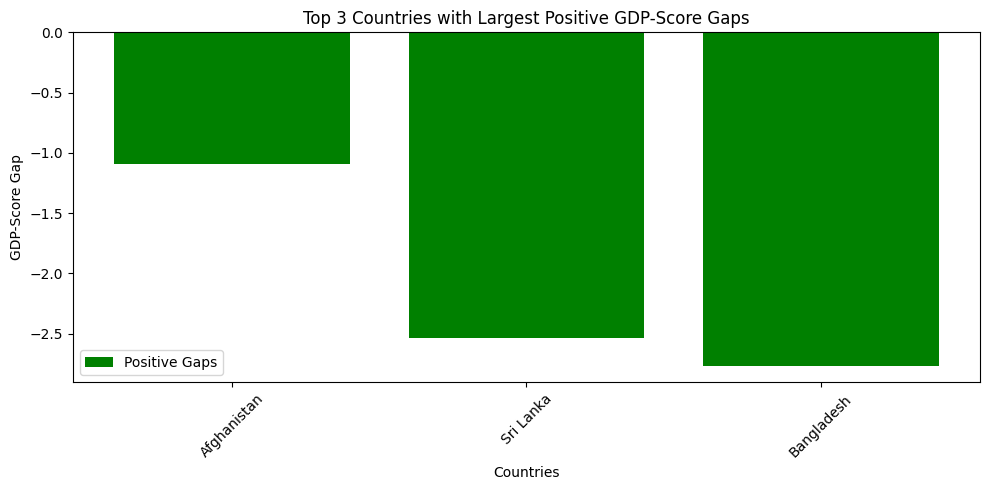

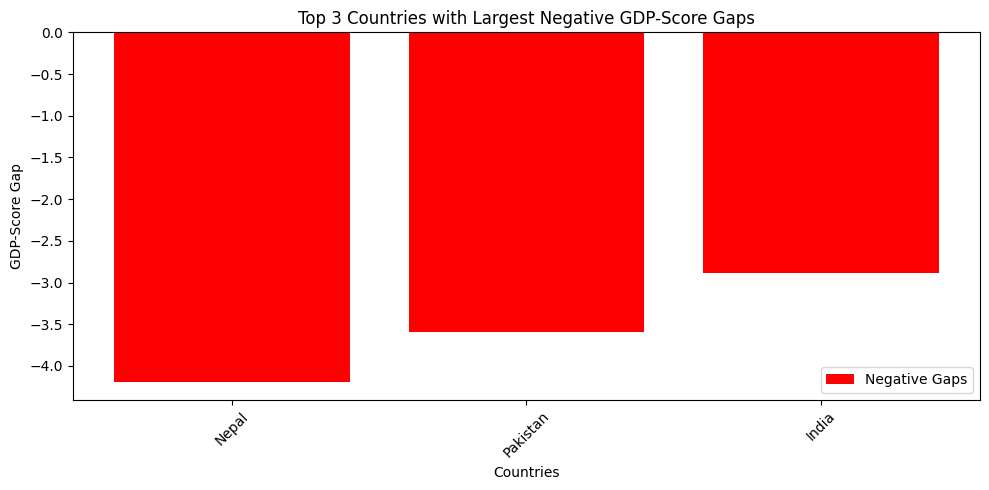

In [74]:
# Task - 5 - Gap Analysis:

# Calculating GDP-Score Gap
south_asia_df['GDP-Score Gap'] = south_asia_df['Log GDP per capita'] - south_asia_df['score']

# Ranking by GDP-Score Gap in ascending and descending order
south_asia_df['Gap Rank Ascending'] = south_asia_df['GDP-Score Gap'].rank(ascending=True)
south_asia_df['Gap Rank Descending'] = south_asia_df['GDP-Score Gap'].rank(ascending=False)

# Displaying ranks
print("Ranking of South Asian Countries by GDP-Score Gap:")
print(south_asia_df[['Country name', 'GDP-Score Gap', 'Gap Rank Ascending', 'Gap Rank Descending']])

# Highlighting top 3 countries with largest positive and negative gaps
top_positive_gaps = south_asia_df.nlargest(3, 'GDP-Score Gap')
top_negative_gaps = south_asia_df.nsmallest(3, 'GDP-Score Gap')

# Bar chart for positive gaps
plt.figure(figsize=(10, 5))
plt.bar(top_positive_gaps['Country name'], top_positive_gaps['GDP-Score Gap'], color='green', label='Positive Gaps')
plt.title('Top 3 Countries with Largest Positive GDP-Score Gaps')
plt.xlabel('Countries')
plt.ylabel('GDP-Score Gap')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# Bar chart for negative gaps
plt.figure(figsize=(10, 5))
plt.bar(top_negative_gaps['Country name'], top_negative_gaps['GDP-Score Gap'], color='red', label='Negative Gaps')
plt.title('Top 3 Countries with Largest Negative GDP-Score Gaps')
plt.xlabel('Countries')
plt.ylabel('GDP-Score Gap')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


### Problem - 3 - Comparative Analysis:

In [75]:
#Task - 1 - Setup Task - Preparing the Middle Eastern Dataset:

# Defining the list of Middle Eastern countries
middle_eastern_countries = [
    "Bahrain", "Iran", "Iraq", "Israel", "Jordan",
    "Kuwait", "Lebanon", "Oman", "Palestine",
    "Qatar", "Saudi Arabia", "Syria",
    "United Arab Emirates", "Yemen"
]

# Filtering the DataFrame for Middle Eastern countries
middle_east_df = df[df['Country name'].isin(middle_eastern_countries)].copy()


In [76]:
# Descriptive Statistics:

# Calculating mean and standard deviation for South Asia
mean_south_asia = south_asia_df['score'].mean()
std_south_asia = south_asia_df['score'].std()

# Calculating mean and standard deviation for Middle East
mean_middle_east = middle_east_df['score'].mean()
std_middle_east = middle_east_df['score'].std()

print(f"South Asia - Mean Score: {mean_south_asia:.2f}, Std Dev: {std_south_asia:.2f}")
print(f"Middle East - Mean Score: {mean_middle_east:.2f}, Std Dev: {std_middle_east:.2f}")

# Determining which region has a higher average score
higher_region = 'South Asia' if mean_south_asia > mean_middle_east else 'Middle East'
print(f"The region with higher average happiness score is: {higher_region}")


South Asia - Mean Score: 3.90, Std Dev: 1.18
Middle East - Mean Score: 5.41, Std Dev: 1.57
The region with higher average happiness score is: Middle East


Top 3 South Asian Countries:
     Country name  score
92         Nepal  5.158
107     Pakistan  4.657
125        India  4.054
Bottom 3 South Asian Countries:
     Country name  score
142  Afghanistan  1.721
128   Bangladesh  3.886
127    Sri Lanka  3.898
Top 3 Middle Eastern Countries:
             Country name  score
4                 Israel  7.341
12                Kuwait  6.951
21  United Arab Emirates  6.733
Bottom 3 Middle Eastern Countries:
     Country name  score
141      Lebanon  2.707
132        Yemen  3.561
124       Jordan  4.186


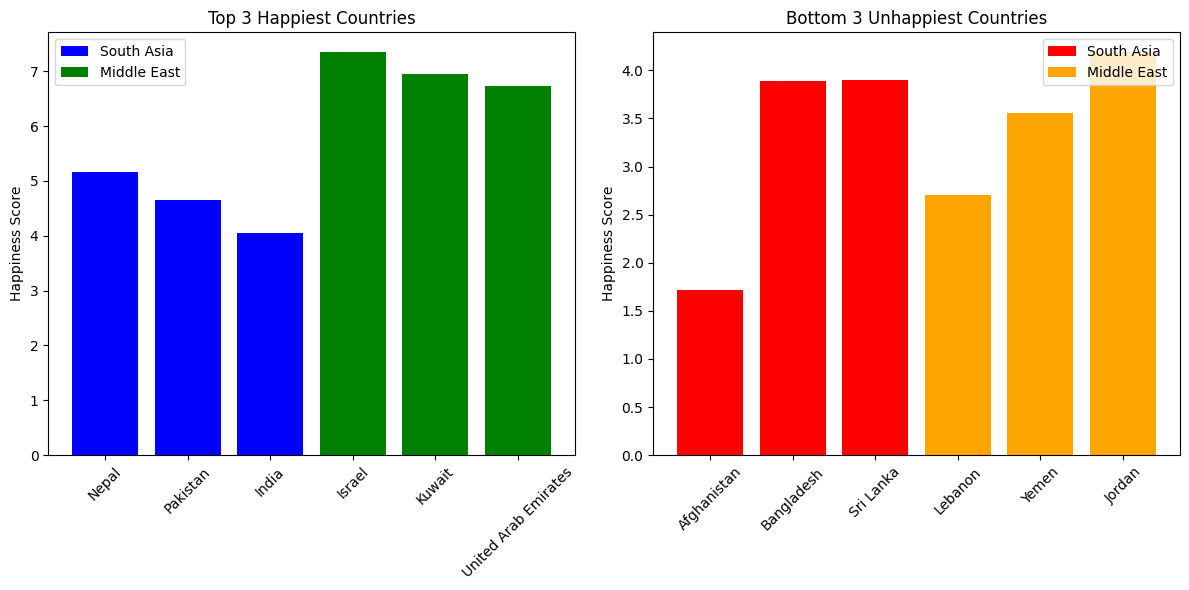

In [77]:
# Top and Bottom Performers:

# Identifying top 3 and bottom 3 countries based on score for both regions
top_south_asia = south_asia_df.nlargest(3, 'score')
bottom_south_asia = south_asia_df.nsmallest(3, 'score')

top_middle_east = middle_east_df.nlargest(3, 'score')
bottom_middle_east = middle_east_df.nsmallest(3, 'score')

print("Top 3 South Asian Countries:\n", top_south_asia[['Country name', 'score']])
print("Bottom 3 South Asian Countries:\n", bottom_south_asia[['Country name', 'score']])
print("Top 3 Middle Eastern Countries:\n", top_middle_east[['Country name', 'score']])
print("Bottom 3 Middle Eastern Countries:\n", bottom_middle_east[['Country name', 'score']])

# Plot bar charts comparing top and bottom performers
plt.figure(figsize=(12, 6))

# Top performers
plt.subplot(1, 2, 1)
plt.bar(top_south_asia['Country name'], top_south_asia['score'], color='blue', label='South Asia')
plt.bar(top_middle_east['Country name'], top_middle_east['score'], color='green', label='Middle East')
plt.title('Top 3 Happiest Countries')
plt.ylabel('Happiness Score')
plt.xticks(rotation=45)
plt.legend()

# Bottom performers
plt.subplot(1, 2, 2)
plt.bar(bottom_south_asia['Country name'], bottom_south_asia['score'], color='red', label='South Asia')
plt.bar(bottom_middle_east['Country name'], bottom_middle_east['score'], color='orange', label='Middle East')
plt.title('Bottom 3 Unhappiest Countries')
plt.ylabel('Happiness Score')
plt.xticks(rotation=45)
plt.legend()

plt.tight_layout()
plt.show()


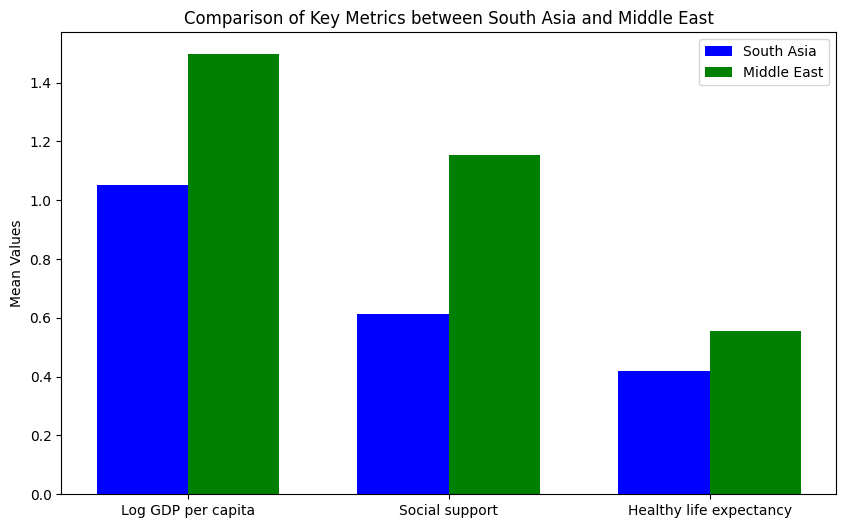

In [78]:
# Metric Comparisons:

# Comparing key metrics between regions using grouped bar charts
metrics = ['Log GDP per capita', 'Social support', 'Healthy life expectancy']
south_asia_means = [south_asia_df[metric].mean() for metric in metrics]
middle_east_means = [middle_east_df[metric].mean() for metric in metrics]

x = np.arange(len(metrics))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - width/2, south_asia_means, width, label='South Asia', color='blue')
bars2 = ax.bar(x + width/2, middle_east_means, width, label='Middle East', color='green')

ax.set_ylabel('Mean Values')
ax.set_title('Comparison of Key Metrics between South Asia and Middle East')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

plt.show()


In [79]:
# Happiness Disparity:

# Computing range (max - min) and coefficient of variation (CV) for Score in both regions
south_asia_range = south_asia_df['score'].max() - south_asia_df['score'].min()
middle_east_range = middle_east_df['score'].max() - middle_east_df['score'].min()

south_asia_cv = std_south_asia / mean_south_asia * 100
middle_east_cv = std_middle_east / mean_middle_east * 100

print(f"South Asia - Range: {south_asia_range:.2f}, CV: {south_asia_cv:.2f}%")
print(f"Middle East - Range: {middle_east_range:.2f}, CV: {middle_east_cv:.2f}%")

greater_variability_region = 'South Asia' if south_asia_cv > middle_east_cv else 'Middle East'
print(f"The region with greater variability in happiness is: {greater_variability_region}")


South Asia - Range: 3.44, CV: 30.21%
Middle East - Range: 4.63, CV: 28.94%
The region with greater variability in happiness is: South Asia



South Asia - Correlation with Freedom to Make Life Choices: 0.80
South Asia - Correlation with Generosity: 0.87


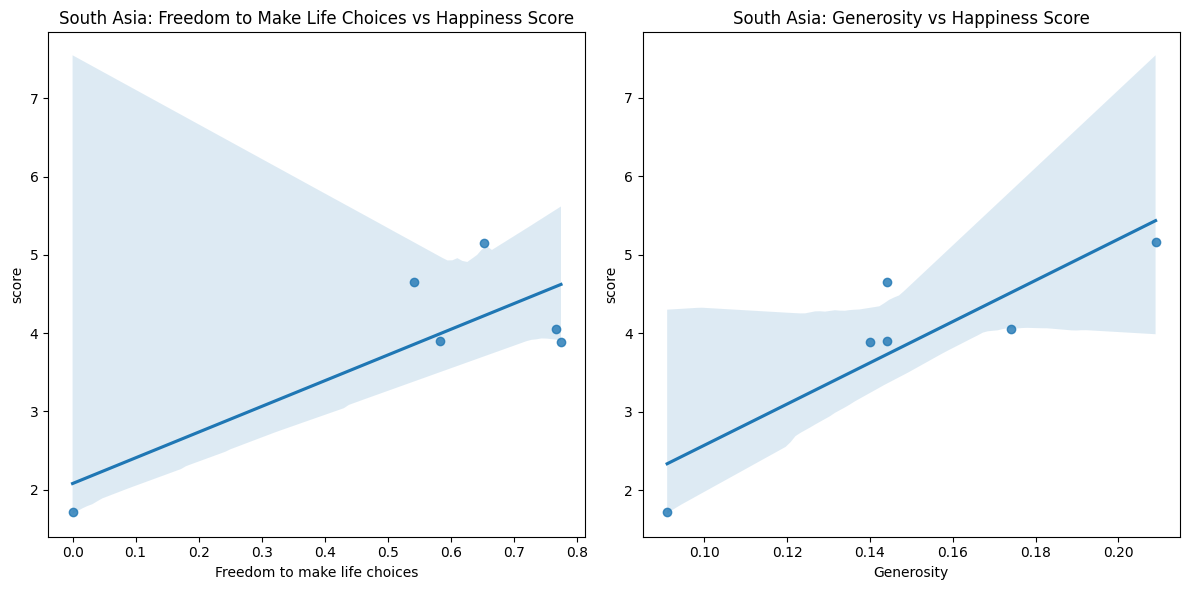


Middle East - Correlation with Freedom to Make Life Choices: 0.86
Middle East - Correlation with Generosity: 0.63


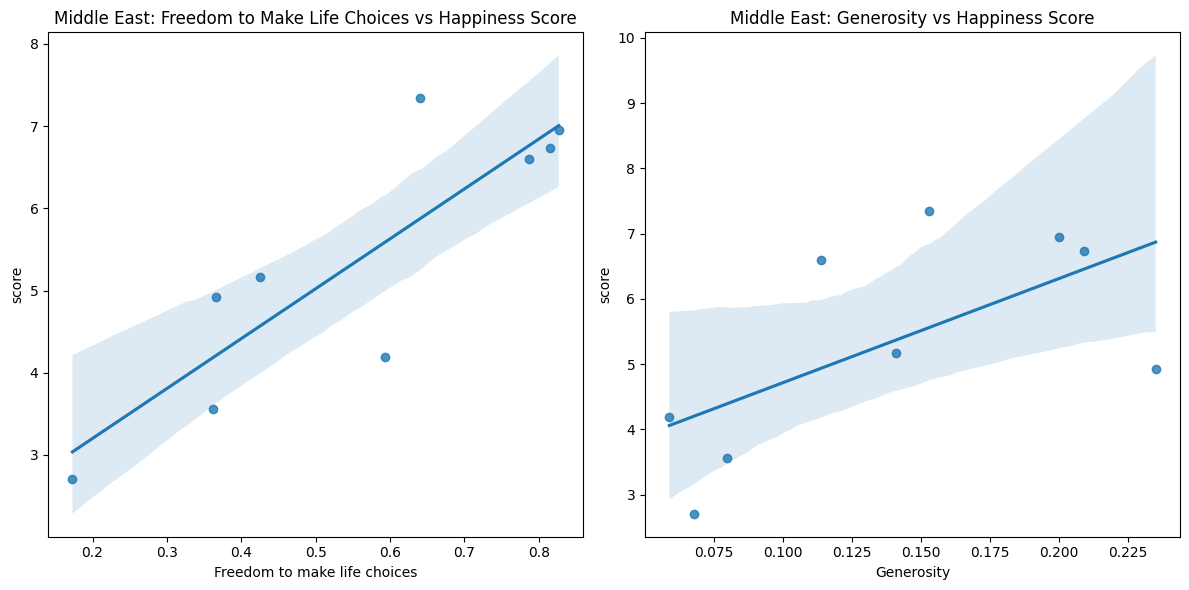

In [80]:
# Correlation Analysis:

# Analyzing correlation of Score with other metrics within each region
for region_name, region_data in [('South Asia', south_asia_df), ('Middle East', middle_east_df)]:
    correlation_freedom = region_data['Freedom to make life choices'].corr(region_data['score'])
    correlation_generosity = region_data['Generosity'].corr(region_data['score'])

    print(f"\n{region_name} - Correlation with Freedom to Make Life Choices: {correlation_freedom:.2f}")
    print(f"{region_name} - Correlation with Generosity: {correlation_generosity:.2f}")

    # Creating scatter plots for visualization
    plt.figure(figsize=(12, 6))

    # Scatter plot for Freedom to Make Life Choices vs Score
    plt.subplot(1, 2, 1)
    sns.regplot(x='Freedom to make life choices', y='score', data=region_data)
    plt.title(f'{region_name}: Freedom to Make Life Choices vs Happiness Score')

    # Scatter plot for Generosity vs Score
    plt.subplot(1, 2, 2)
    sns.regplot(x='Generosity', y='score', data=region_data)
    plt.title(f'{region_name}: Generosity vs Happiness Score')

    plt.tight_layout()
    plt.show()


Outliers in South Asia based on Happiness Score:
    Country name  score  Log GDP per capita
142  Afghanistan  1.721               0.628

Outliers in Middle East based on Happiness Score:
Empty DataFrame
Columns: [Country name, score, Log GDP per capita]
Index: []


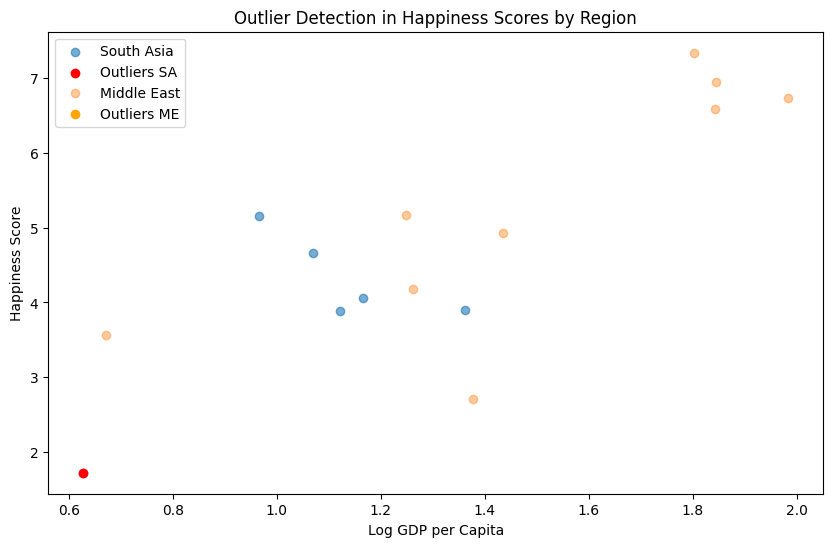

In [82]:
# Outlier Detection:

# Identifying outlier countries based on Score and GDP per Capita for both regions
def identify_outliers(df):
    Q1_score = df['score'].quantile(0.25)
    Q3_score = df['score'].quantile(0.75)
    IQR_score = Q3_score - Q1_score

    outliers_score = df[
        (df['score'] < (Q1_score - 1.5 * IQR_score)) |
        (df['score'] > (Q3_score + 1.5 * IQR_score))
    ]

    return outliers_score

outliers_sa = identify_outliers(south_asia_df)
outliers_me = identify_outliers(middle_east_df)

print("Outliers in South Asia based on Happiness Score:")
print(outliers_sa[['Country name', 'score', 'Log GDP per capita']])

print("\nOutliers in Middle East based on Happiness Score:")
print(outliers_me[['Country name', 'score', 'Log GDP per capita']])

# Visualization of outliers
plt.figure(figsize=(10, 6))
plt.scatter(south_asia_df['Log GDP per capita'], south_asia_df['score'], label='South Asia', alpha=0.6)
plt.scatter(outliers_sa['Log GDP per capita'], outliers_sa['score'], color='red', label='Outliers SA')

plt.scatter(middle_east_df['Log GDP per capita'], middle_east_df['score'], label='Middle East', alpha=0.4)
plt.scatter(outliers_me['Log GDP per capita'], outliers_me['score'], color='orange', label='Outliers ME')

plt.title('Outlier Detection in Happiness Scores by Region')
plt.xlabel('Log GDP per Capita')
plt.ylabel('Happiness Score')
plt.legend()
plt.show()


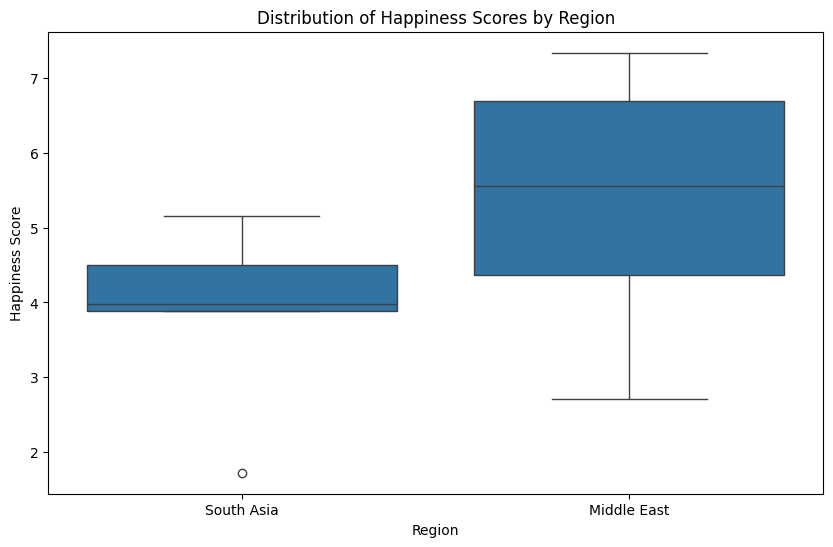

In [83]:
# Visualization:

# Creating boxplots comparing the distribution of Score between South Asia and the Middle East
combined_df = pd.concat([
    south_asia_df.assign(Region='South Asia'),
    middle_east_df.assign(Region='Middle East')
])

plt.figure(figsize=(10, 6))
sns.boxplot(x='Region', y='score', data=combined_df)
plt.title('Distribution of Happiness Scores by Region')
plt.ylabel('Happiness Score')
plt.show()


In [46]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
